In [15]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import date
from tbats import TBATS
from scipy.stats import boxcox
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_percentage_error, r2_score, mean_squared_error

In [74]:
link = "./dataset/hoboken.csv"
hoboken = pd.read_csv(link)
hoboscaler = MinMaxScaler()
hoboken.Date = pd.to_datetime(hoboken.Date)
hoboken[['Value']] = hoboscaler.fit_transform(hoboken[['Value']])
hoboken.head()

,Date,Value
0,2015-01-31,0.000000
1,2015-02-28,0.027298
2,2015-03-31,0.039681
3,2015-04-30,0.049087
4,2015-05-31,0.066606


In [75]:
# splitting data into train and test
train_size = 93
train_data, test_data = hoboken.iloc[:train_size],hoboken.iloc[train_size:]

In [76]:
train_data

,Date,Value
0,2015-01-31,0.000000
1,2015-02-28,0.027298
2,2015-03-31,0.039681
3,2015-04-30,0.049087
4,2015-05-31,0.066606
...,...,...
88,2022-05-31,0.647926
89,2022-06-30,0.697129
90,2022-07-31,0.746749
91,2022-08-31,0.765914


/var/folders/2b/36p5ztyn4yj61wp8q88_2fxh0000gn/T/ipykernel_98527/310457745.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['predicted_value'] = forecast


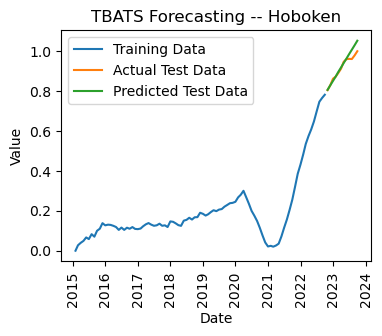

R-squared Score: 0.8073397519781721
Root Mean Squared Error (RMSE): 0.02640620628541291
Mean Squared Error (MSE): 0.0006972877303877803
MAPE: 0.02


In [77]:
# Fit the TBATS model on the training data
estimator = TBATS(seasonal_periods=(12,),use_arma_errors=True,use_box_cox=False,use_trend=True, use_damped_trend=False)
model = estimator.fit(train_data.Value)

# Forecast future values for the test set
forecast = model.forecast(steps=len(test_data))

# Add the forecasted values to the test_data DataFrame
test_data['predicted_value'] = forecast

# plotting 
plt.figure(figsize=(4,3))
plt.plot(train_data['Date'], train_data['Value'], label='Training Data')
plt.plot(test_data['Date'], test_data['Value'], label='Actual Test Data')
plt.plot(test_data['Date'], test_data['predicted_value'], label='Predicted Test Data')
plt.title('TBATS Forecasting -- Hoboken')
plt.xlabel('Date')
plt.xticks(rotation='vertical')
plt.ylabel('Value')
plt.legend()
plt.show()

# Reshape forecast back to 1D array if needed
forecast = forecast.ravel()

# Calculate R2 score
r2 = r2_score(test_data.Value, forecast)

# Print or use the R2 score as needed
print(f'R-squared Score: {r2}')

rmse = mean_squared_error(test_data.Value, forecast, squared=False)
print(f'Root Mean Squared Error (RMSE): {rmse}')
mse = mean_squared_error(test_data.Value, forecast, squared=True)
print(f'Mean Squared Error (MSE): {mse}')

mape = mean_absolute_percentage_error(test_data.Value, forecast)

print(f'MAPE: {mape:.2f}')

# TBATS for New york dataset

In [64]:
link = "./dataset/new york.csv"
newyork = pd.read_csv(link)
newyorkscaler = MinMaxScaler()
newyork.Date = pd.to_datetime(newyork.Date)
newyork[['Value']] = newyorkscaler.fit_transform(newyork[['Value']])
newyork.head()

,index,Date,Value
0,0,2015-01-31,0.056079
1,1,2015-02-28,0.075107
2,2,2015-03-31,0.089488
3,3,2015-04-30,0.105672
4,4,2015-05-31,0.113027


In [65]:
# splitting data into train and test
train_size = 93
train_data2, test_data2 = newyork.iloc[:train_size],newyork.iloc[train_size:]
train_data2

,index,Date,Value
0,0,2015-01-31,0.056079
1,1,2015-02-28,0.075107
2,2,2015-03-31,0.089488
3,3,2015-04-30,0.105672
4,4,2015-05-31,0.113027
...,...,...,...
88,88,2022-05-31,0.796469
89,89,2022-06-30,0.832390
90,90,2022-07-31,0.860964
91,91,2022-08-31,0.885189


/Users/manedge/miniconda/envs/EnvironmentTest/lib/python3.11/site-packages/tbats/error/ExceptionHandler.py:13: InputArgsWarning: Box-Cox transformation (use_box_cox) was forced to True but there are negative values in input series. Setting use_box_cox to False.
  warnings.warn(message, warning_type)
/var/folders/2b/36p5ztyn4yj61wp8q88_2fxh0000gn/T/ipykernel_98527/1698428311.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data2['predicted_value'] = forecast2


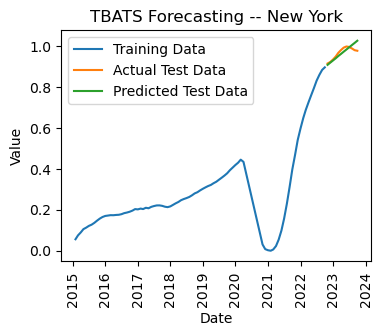

R-squared Score: 0.4402483433833283
Root Mean Squared Error (RMSE): 0.02105549756128879
Mean Squared Error (MSE): 0.0004433339775534381
MAPE: 0.02


In [73]:
estimator2 = TBATS(seasonal_periods=(12,),use_arma_errors=False,use_box_cox=True, use_trend=True, use_damped_trend=False)

# Training
model2 = estimator2.fit(train_data2['Value'])

# Predicting 
forecast2 = model2.forecast(steps=len(test_data2))

# Add the forecasted values to the test_data DataFrame
test_data2['predicted_value'] = forecast2


# Reshaping to avoid mismatch issues 
forecast2 = forecast2.ravel()

# Plotting
plt.figure(figsize=(4,3))
plt.plot(train_data2.Date, train_data2['Value'], label='Training Data')
plt.plot(test_data2.Date, test_data2['Value'], label='Actual Test Data')
plt.plot(test_data2.Date, test_data2['predicted_value'], label='Predicted Test Data')
plt.title('TBATS Forecasting -- New York')
plt.xticks(rotation='vertical')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

r2_sq2 = r2_score(test_data2.Value, forecast2)
print(f'R-squared Score: {r2_sq2}')

rmse2 = mean_squared_error(test_data2.Value, forecast2,squared=False)
print(f'Root Mean Squared Error (RMSE): {rmse2}')

mse2 = mean_squared_error(test_data2.Value, forecast2,squared=True)
print(f'Mean Squared Error (MSE): {mse2}')

mape2 = mean_absolute_percentage_error(test_data2.Value, forecast2)
print(f'MAPE: {mape2:.2f}')

# Tbats for philly dataset

In [67]:
link = "./dataset/philly.csv"
philly = pd.read_csv(link)
phillyscaler = MinMaxScaler()
philly.Date = pd.to_datetime(philly.Date)
philly[['Value']] = phillyscaler.fit_transform(philly[['Value']])
philly.head()

,Date,Value
0,2015-01-31,0.000000
1,2015-02-28,0.006385
2,2015-03-31,0.028056
3,2015-04-30,0.030388
4,2015-05-31,0.044152


In [68]:
# splitting data into train and test
train_size = 93
train_data1, test_data1 = philly.iloc[:train_size],philly.iloc[train_size:]
train_data1

,Date,Value
0,2015-01-31,0.000000
1,2015-02-28,0.006385
2,2015-03-31,0.028056
3,2015-04-30,0.030388
4,2015-05-31,0.044152
...,...,...
88,2022-05-31,0.880378
89,2022-06-30,0.901562
90,2022-07-31,0.913210
91,2022-08-31,0.919792


/var/folders/2b/36p5ztyn4yj61wp8q88_2fxh0000gn/T/ipykernel_98527/480485165.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data1['predicted_value'] = forecast1


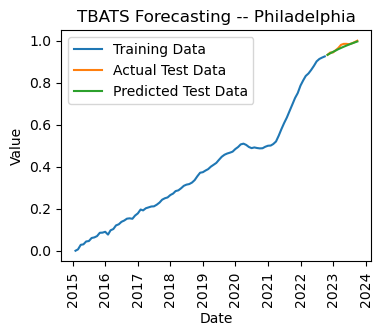

R-squared Score: 0.9005852719769538
Root Mean Squared Error (RMSE): 0.0067388300454523245
Mean Squared Error (MSE): 4.541183038149098e-05
MAPE: 0.00


In [71]:
estimator1 = TBATS(seasonal_periods=(12,),use_arma_errors=False,use_box_cox=False,use_trend=True, use_damped_trend=True)

# Training
model1 = estimator1.fit(train_data1['Value'])

# Predicting
forecast1 = model1.forecast(steps=len(test_data1))


test_data1['predicted_value'] = forecast1

# plotting
plt.figure(figsize=(4,3))
plt.plot(train_data1['Date'], train_data1['Value'], label='Training Data')
plt.plot(test_data1['Date'], test_data1['Value'], label='Actual Test Data')
plt.plot(test_data1['Date'], test_data1['predicted_value'], label='Predicted Test Data')
plt.title('TBATS Forecasting -- Philadelphia')
plt.xlabel('Date')
plt.xticks(rotation='vertical')
plt.ylabel('Value')
plt.legend()
plt.show()


forecast1 = forecast1.ravel()

r2_sq = r2_score(test_data1.Value, forecast1)

print(f'R-squared Score: {r2_sq}')

rmse = mean_squared_error(test_data1.Value, forecast1,squared=False)
print(f'Root Mean Squared Error (RMSE): {rmse}')

mse = mean_squared_error(test_data1.Value, forecast1, squared=True)
print(f'Mean Squared Error (MSE): {mse}')

mape1 = mean_absolute_percentage_error(test_data1.Value, forecast1)

print(f'MAPE: {mape1:.2f}')